In [27]:
!pip install ucimlrepo

**Import Dataset**

In [28]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# Combining the two datasets into one DataFrame
X['income']=y
df=X
# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

**Import Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Analyze the dataset

In [30]:
df.head().T


,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [31]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [32]:
df = df.replace(to_replace = '%?%', value = np.nan) #replaces everything with a '?' with Nan
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [33]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [34]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [35]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [36]:
df['native-country'].fillna(df['native-country'].mode().values[0],inplace=True)

In [37]:
df['workclass'].fillna(df['workclass'].mode().values[0],inplace=True)

In [38]:
df['occupation'].fillna(df['occupation'].mode().values[0],inplace=True)

In [39]:
df['income'].replace({'<=50K.' : '<=50K',
               '>50K.'  : '>50K'})

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [40]:
df["income"].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [41]:
df["income"] = df["income"].str.strip('.')  # Remove '.' from the end of strings
df["income"].value_counts()
df["income"] = df["income"].replace({'<=50K': 1, '>50K': 0})
print(df["income"].value_counts()) ##############################################################################################################################

1    37155
0    11687
Name: income, dtype: int64


In [42]:
df.sample(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
29308,27,Private,335421,Masters,14,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,1
17642,40,Private,116632,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,60,United-States,0
33661,34,State-gov,32174,HS-grad,9,Separated,Other-service,Not-in-family,White,Female,0,0,40,United-States,1
26858,66,Private,262285,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,1
28038,32,Private,141490,Assoc-voc,11,Divorced,Exec-managerial,Unmarried,White,Female,0,0,50,United-States,1
26564,43,Private,240504,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,1
13238,25,Local-gov,167835,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,38,United-States,0
20788,51,Private,24344,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,1
40671,18,Local-gov,283342,10th,6,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,1
28146,40,Self-emp-not-inc,30759,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,1


**Data Exploration**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [44]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.760718
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


**Categorical Column Analysis**

In [45]:
null_values_in_targets = y.isnull().sum()
print(null_values_in_targets)


income    0
dtype: int64


In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [47]:
df['sex'].unique().tolist()

['Male', 'Female']

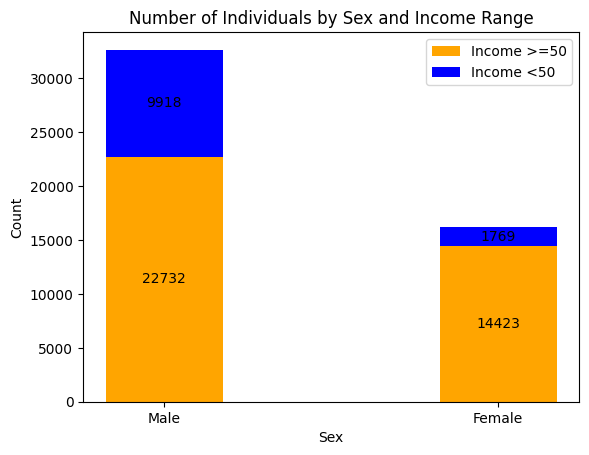

In [48]:
# Initialize a dictionary to hold the count of incomes >=50 and <50 for each sex
income_counts = {
    '>=50': np.array([df[(df['sex'] == sex) & (df['income'] == 1)].shape[0] for sex in df['sex'].unique().tolist()]),
    '<50': np.array([df[(df['sex'] == sex) & (df['income'] == 0)].shape[0] for sex in df['sex'].unique().tolist()])
}

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
species = df['sex'].unique().tolist()  # Since we're comparing within male and female groups
bottom = np.zeros(2)  # Initialize bottom at zero for the first set of bars

colors = {'>=50': 'orange', '<50': 'blue'}  # Assign colors to each condition for clarity

for income_range, counts in income_counts.items():
    p = ax.bar(species, counts, width, label=f'Income {income_range}', bottom=bottom, color=colors[income_range])
    bottom += counts  # Update bottom for the next set of bars
    ax.bar_label(p, label_type='center')

ax.set_title('Number of Individuals by Sex and Income Range')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.legend()

plt.show()


In [49]:
#Remove duplicate rows
df = df.drop_duplicates()

In [50]:
df.shape

(48793, 15)

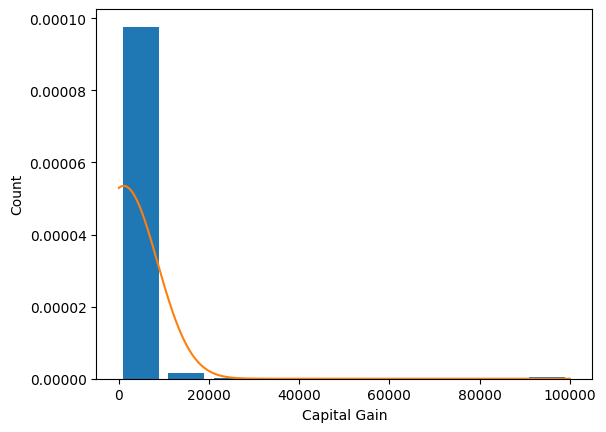

In [59]:
from scipy.stats import norm
plt.hist(df['capital-gain'], bins=10, rwidth=0.8, density=True)
plt.xlabel('Capital Gain')
plt.ylabel('Count')
rng = np.arange(df['capital-gain'].min(), df['capital-gain'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['capital-gain'].mean(), df['capital-gain'].std()))

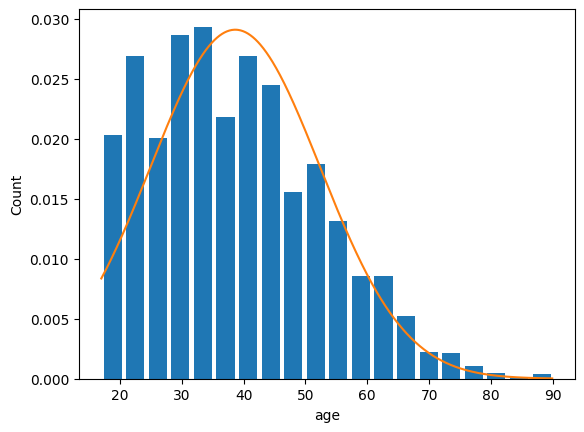

In [63]:
from scipy.stats import norm
plt.hist(df['age'], bins=20, rwidth=0.8, density=True)
plt.xlabel('age')
plt.ylabel('Count')
rng = np.arange(df['age'].min(), df['age'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['age'].mean(), df['age'].std()))

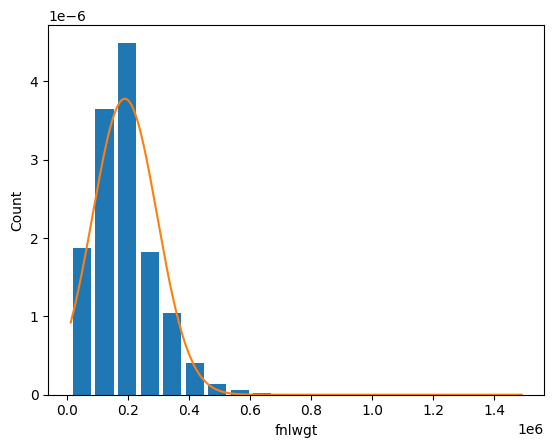

In [62]:
plt.hist(df['fnlwgt'], bins=20, rwidth=0.8, density=True)
plt.xlabel('fnlwgt')
plt.ylabel('Count')
rng = np.arange(df['fnlwgt'].min(), df['fnlwgt'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['fnlwgt'].mean(), df['fnlwgt'].std()))

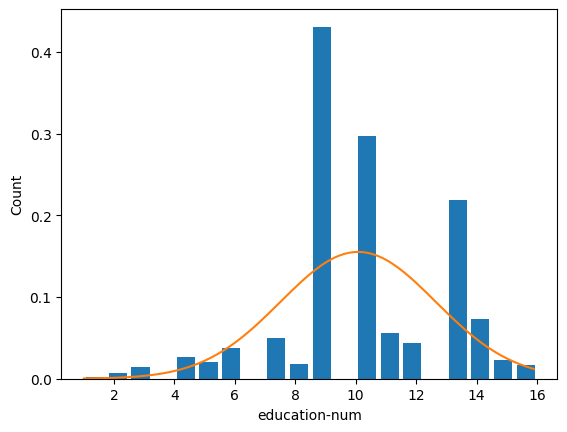

In [65]:
plt.hist(df['education-num'], bins=20, rwidth=0.8, density=True)
plt.xlabel('education-num')
plt.ylabel('Count')
rng = np.arange(df['education-num'].min(), df['education-num'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['education-num'].mean(), df['education-num'].std()))

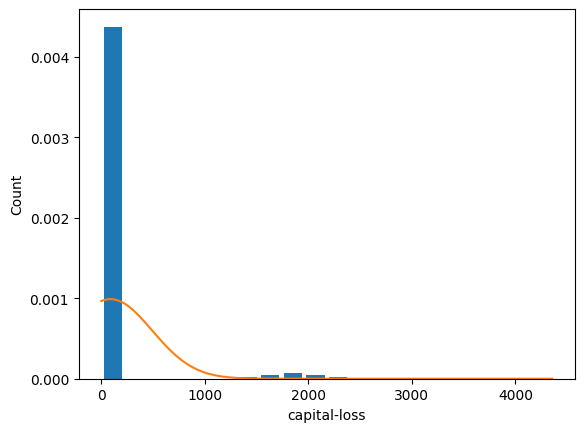

In [68]:
plt.hist(df['capital-loss'], bins=20, rwidth=0.8, density=True)
plt.xlabel('capital-loss')
plt.ylabel('Count')
rng = np.arange(df['capital-loss'].min(), df['capital-loss'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, df['capital-loss'].mean(), df['capital-loss'].std()))

In [70]:
df['occupation'].value_counts()

Prof-specialty       7130
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [71]:
df['education'].value_counts()

HS-grad         15770
Some-college    10865
Bachelors        8014
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [53]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
